In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [13]:
# Part 1: Prepare the Data

In [14]:
# Read myopia.csv into a Pandas DataFrame.
fp = Path('Myopia.csv')
myopia_df = pd.read_csv(fp)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [15]:
# 14 features, 1 y
myopia_df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [16]:
# Remove the "MYOPIC" column from the dataset.
myopia_df = myopia_df.drop('MYOPIC', axis=1)

In [ ]:
# Note: The target column is needed for supervised machine learning, but it will make an unsupervised model biased. After all, the target column is effectively providing clusters already!

In [7]:
# Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.
# Create a scaler to standardize the data
scaler = StandardScaler()

# Train the scaler with the data.
X_scaled = scaler.fit_transform(myopia_df)

In [ ]:
# Part 2: Apply Dimensionality Reduction

In [ ]:
#   * **Hint:** Rather than specify the number of principal components when you instantiate the PCA model, state the desired **explained variance**. For example, say that a dataset has 100 features. Using `PCA(n_components=0.99)` creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this assignment, preserve 90% of the explained variance in dimensionality reduction.

In [22]:
# Perform dimensionality reduction with PCA. How did the number of the features change?

 # pca of 90%
pca = PCA(n_components=0.9)

# fit transform it!
myopia_pca = pca.fit_transform(X_scaled)

# Get the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [23]:
#notice there are 10 features, down from 14, with a preserved ratio sum >90%
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [25]:
# myopia_pca

In [ ]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation. 

In [34]:
#Initialize the t-SNE model 
tsne = TSNE(learning_rate=250, n_components=3, perplexity=50, verbose=1, n_iter=2500)
# tsne = TSNE(learning_rate=35)

In [35]:
#Reduce dimensions
#the following fit/transform will drop our components based on myopia_pca. cool
tsne_features = tsne.fit_transform(myopia_pca)

/Users/jesse/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.001s...
[t-SNE] Computed neighbors for 618 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.438866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 102.984512
[t-SNE] KL divergence after 2500 iterations: 2.208339


In [36]:
tsne_features.shape

(618, 3)

In [37]:
tsne_features

array([[-178.6153  , -217.70576 ,   44.51763 ],
       [ -97.70689 ,  106.70599 ,  -98.53064 ],
       [-217.7103  ,   17.250698, -207.08076 ],
       ...,
       [-169.24701 ,  132.18192 , -127.18111 ],
       [ 137.96834 ,  -55.103664,   83.61998 ],
       [-110.74774 ,  137.89648 , -198.44144 ]], dtype=float32)

In [40]:
# grab labels
myopia_df = pd.read_csv(fp)
myopia_labels = myopia_df['MYOPIC']

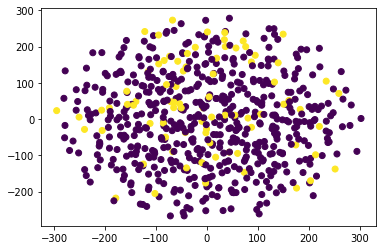

In [41]:
# Create a scatter plot of the t-SNE output. Are there distinct clusters?
plt.scatter(tsne_features[:,0],tsne_features[:,1], c=myopia_labels)

In [ ]:
# the clusters are definitely not visible on a 2d plane. the other variables must play a large role in myopia

In [42]:
### Part 3: Perform a Cluster Analysis with K-means
# Create an elbow plot to identify the best number of clusters. Make sure to do the following:

# * Use a `for` loop to determine the inertia for each `k` between 1 through 10. 
inertia = []
k = list(range(1, 11))
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# * If possible, determine where the elbow of the plot is, and at which value of `k` it appears.
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


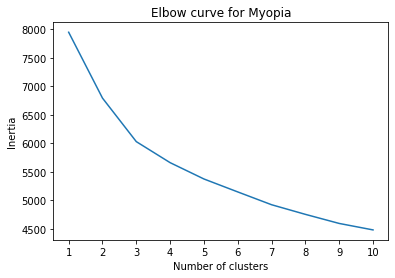

In [43]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia')
plt.show()

In [ ]:
# 3 it is. arguably 5

In [44]:
# Create a DataFrame from the PCA transformed data for K-Means modelling and plotting
columns=[]
for i in range(len(pca.components_)):
    columns.append(i+1)
#magic
pca_df = pd.DataFrame(myopia_pca, columns=columns)
pca_df['class']= km.labels_
pca_df.head()

,1,2,3,4,5,6,7,8,9,10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,6
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,8
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,6
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2


/Users/jesse/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/Users/jesse/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


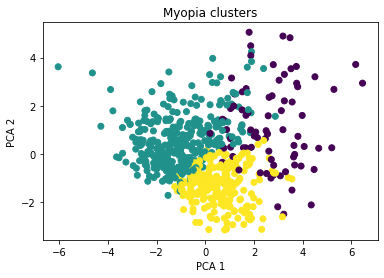

In [47]:
# Initialize the K-Means model with n_clusters 3
model = KMeans(n_clusters=3, random_state=0)

# Train the model
model.fit(pca_df)

# Predict clusters
predictions = model.predict(pca_df)

# Add predicted clusters (labels) to DataFrame
pca_df['class'] = model.labels_
# Plot the Clusters
plt.scatter(x=pca_df[1], y=pca_df[2], c=pca_df['class'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Myopia clusters')
plt.show()

In [ ]:
### Part 4: Make a Recommendation

In [ ]:
# Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters? 
The optimal number of clusters seems to be 3 based on the Elbow curve, arguably 5 is worth checking out

I would absolutely argue that clusters are present, at a minimum 2, more likely 3, and potentially 4 or 5.

We only had 600 some samples, so I would absolutely suggest getting more data and performing more modeling